In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from google.colab import files
from pprint import pprint
import numpy as np


In [ ]:
# Upload the data
from google.colab import files
uploaded = files.upload()

Saving 2016_predicted_sentiment.csv to 2016_predicted_sentiment.csv


In [ ]:
sentiment_df_2016 = pd.read_csv('2016_predicted_sentiment.csv', parse_dates=['date'])
sentiment_df_2016['net_sentiment'] = sentiment_df_2016['sentiment_score'] * sentiment_df_2016['sentiment']
sentiment_df_2016.tail(20)

,date,text,label,sentiment_label,sentiment_score,sentiment,net_sentiment
480,2023-10-25,"Long on Hype, A.I. Is No Guarantee for Profits...",NaN,NEGATIVE,0.998056,-1,-0.998056
481,2023-10-27,Cruise Stops All Driverless Taxi Operations in...,NaN,NEGATIVE,0.997791,-1,-0.997791
482,2023-11-07,Uber Reports Record Ridership and Second Strai...,NaN,POSITIVE,0.987549,1,0.987549
483,2023-11-20,‘Lost Time for No Reason’: How Driverless Taxi...,NaN,NEGATIVE,0.992582,-1,-0.992582
484,2023-11-29,G.M. to Cut Spending on Cruise Self-Driving Un...,NaN,NEGATIVE,0.999214,-1,-0.999214
485,2023-12-14,Struggling Cruise Cuts About 25 Percent of Its...,NaN,NEGATIVE,0.999493,-1,-0.999493
486,2023-12-30,The Pentagon Road to Venture Capital Here is a...,NaN,NEGATIVE,0.515009,-1,-0.515009
487,2024-01-25,Cruise Says Hostility to Regulators Led to Gro...,NaN,NEGATIVE,0.999409,-1,-0.999409
488,2024-02-02,We Tried the Apple Vision Pro + Can Congress P...,NaN,NEGATIVE,0.997163,-1,-0.997163
489,2024-02-06,Stop Wearing Vision Pro Goggles While Driving ...,NaN,NEGATIVE,0.998636,-1,-0.998636


In [ ]:
daily_sentiment = sentiment_df_2016.groupby('date')['net_sentiment'].sum().reset_index()
daily_sentiment.head(10)
print("Sum:", daily_sentiment['net_sentiment'].sum())
print("Average:", daily_sentiment['net_sentiment'].mean())



Sum: -155.26537209749222
Average: -0.37594521088981164


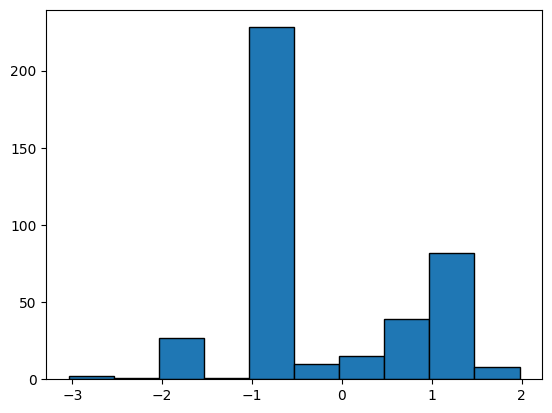

In [ ]:
plt.hist(daily_sentiment['net_sentiment'], bins=10, edgecolor='black')
plt.savefig('sent_hist.jpg')

plt.show()


In [ ]:
files.download('sent_hist.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

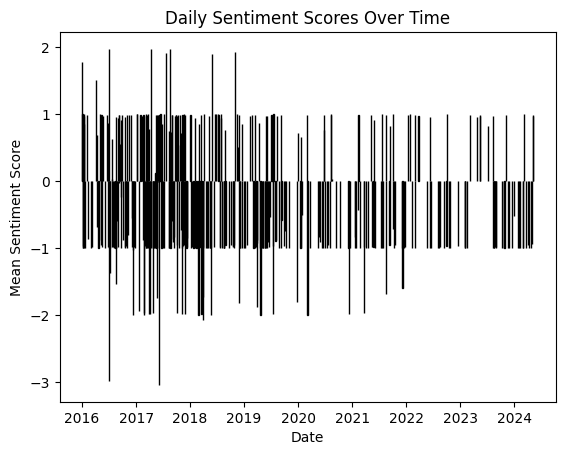

In [ ]:
plt.bar(daily_sentiment['date'], daily_sentiment['net_sentiment'], color='skyblue', edgecolor='black')
plt.title('Daily Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')
plt.savefig('sentiment_over_time.jpg')

plt.show()



In [ ]:
files.download('sentiment_over_time.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
tickers = ['GOOG', 'TSLA', 'GM', 'NVDA', 'UBER','TSPH', 'AUR', ]
begin_date = '2016-01-01'
mid_date = '2020-01-01'
end_date = '2024-05-24'


# Fetch stock data
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.Ticker(ticker)
    stock_data = stock_data.history(start=start_date, end=end_date)
    stock_data['pct_change'] = stock_data['Close'].pct_change() * 100
    stock_data.reset_index(inplace=True)
    stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.tz_localize(None)
    return stock_data[['Date','Close', 'pct_change']]

# Fetch and combine stock data
stock_data = {}
for ticker in tickers:
    stock_data[ticker] = fetch_stock_data(ticker, mid_date, end_date)

Correlation between sentiment and stock returns for GOOG: -0.019337936833963572


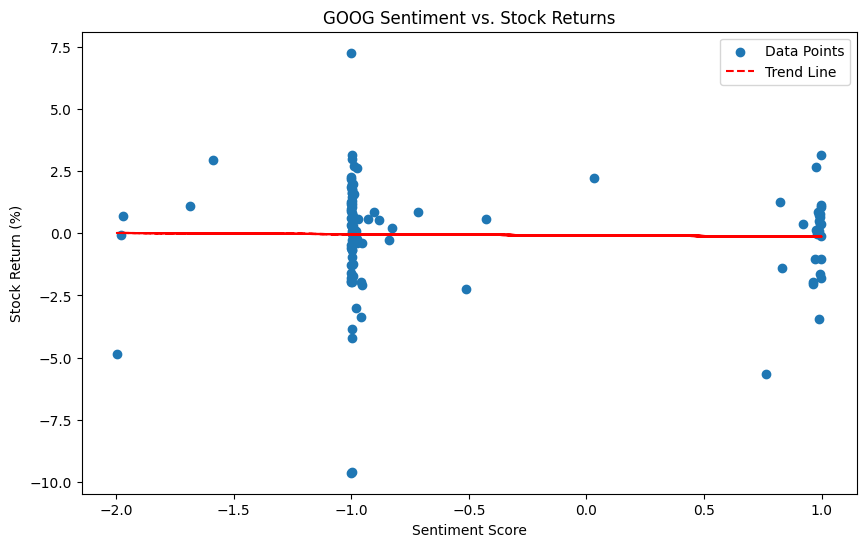

Correlation between sentiment and stock returns for TSLA: -0.10990240911697091


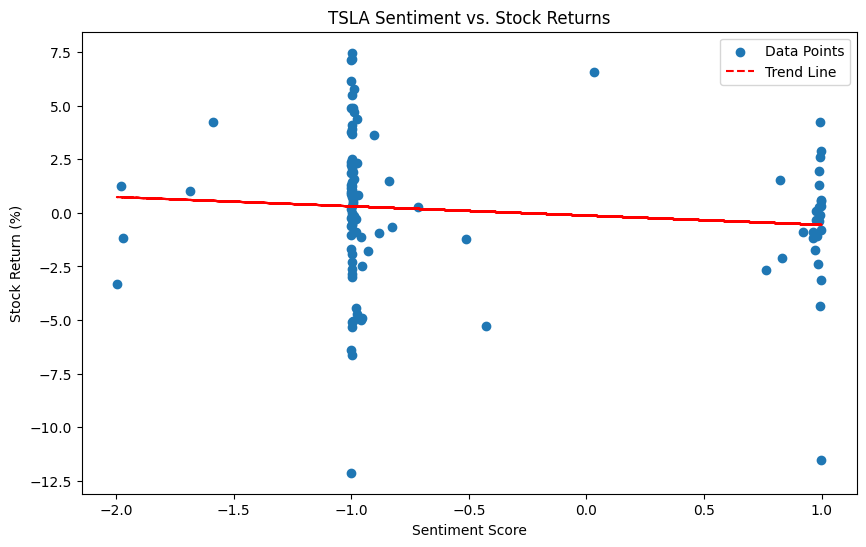

Correlation between sentiment and stock returns for GM: -0.13061562361107046


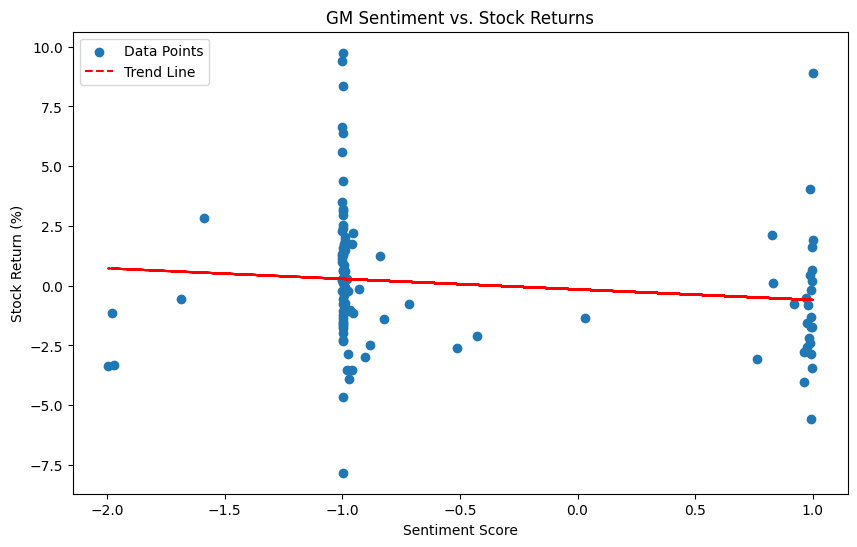

Correlation between sentiment and stock returns for NVDA: -0.10522619122007631


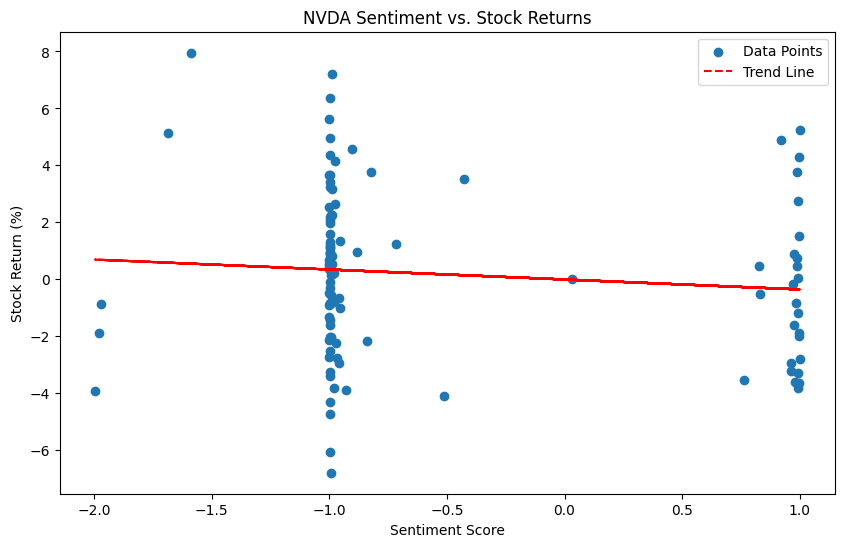

Correlation between sentiment and stock returns for UBER: -0.08181229064970419


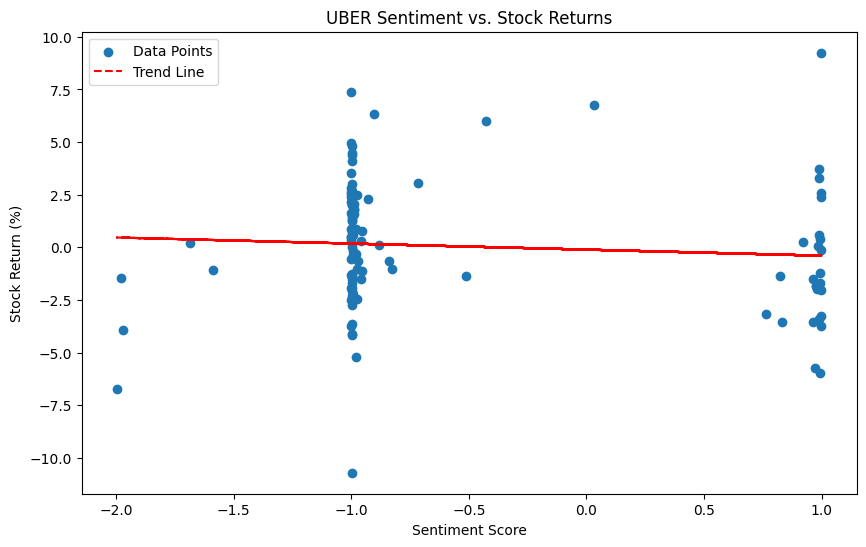

Correlation between sentiment and stock returns for TSPH: 0.3612853530574521


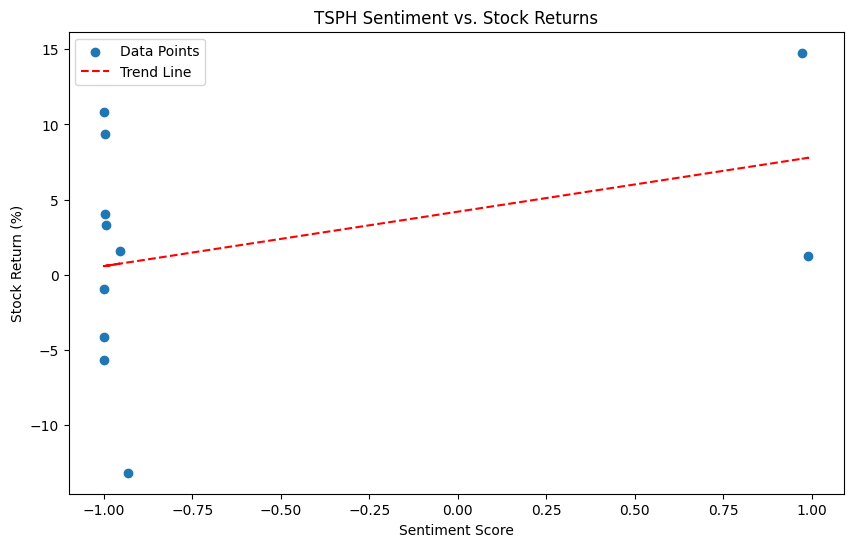

Correlation between sentiment and stock returns for AUR: -0.2597688985905035


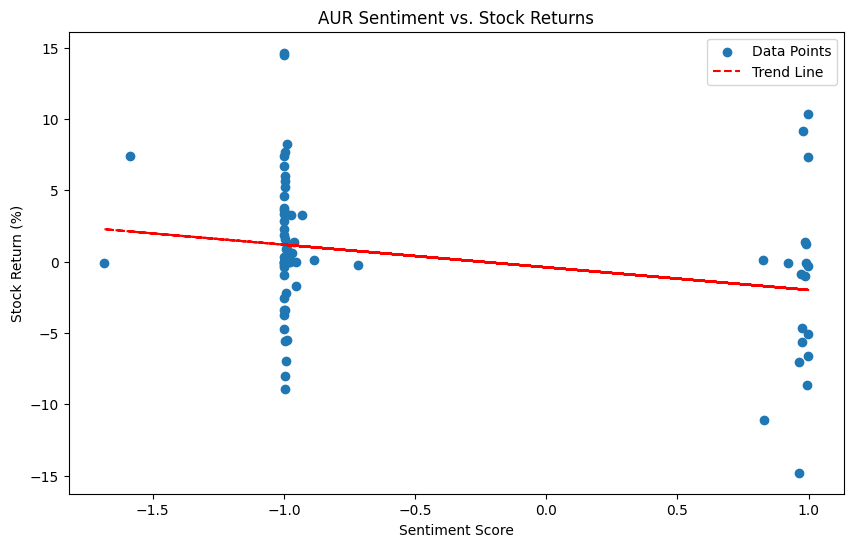

In [ ]:
# Merge sentiment and stock data
def merge_data(sentiment_data, stock_data):
    merged_df = pd.merge(sentiment_data, stock_data, left_on='date', right_on='Date')
    return merged_df.dropna()

# Analyze correlation
for ticker in tickers:
    merged_df = merge_data(daily_sentiment, stock_data[ticker])
    correlation = merged_df['net_sentiment'].corr(merged_df['pct_change'])
    print(f'Correlation between sentiment and stock returns for {ticker}: {correlation}')

    # Plot the relationship
    plt.figure(figsize=(10, 6))
    plt.scatter(merged_df['net_sentiment'], merged_df['pct_change'], label='Data Points')

    # Add trend line
    z = np.polyfit(merged_df['net_sentiment'], merged_df['pct_change'], 1)
    p = np.poly1d(z)
    plt.plot(merged_df['net_sentiment'], p(merged_df['net_sentiment']), "r--", label='Trend Line')

    plt.title(f'{ticker} Sentiment vs. Stock Returns')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Stock Return (%)')
    plt.legend()
    plt.savefig(f'{ticker}_{mid_date}_{end_date}_stock_correlation.jpg')
    plt.show()


In [ ]:
for ticker in tickers:
  files.download(f'{ticker}_{mid_date}_{end_date}_stock_correlation.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>